In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Data Cleaning and Documentation Procedure

### Cleansing of Data set #1 and #2

In [2]:
#India Affected Water Quality Areas data: Government data related to the water quality of India
df = pd.read_csv("/Users/stevenlu/Desktop/IndiaAffectedWaterQualityAreas.csv",engine='python')
df2 = pd.read_csv("/Users/stevenlu/Desktop/water_dataX.csv", engine = 'python')

In [3]:
#Showing first 5 rows of data
df.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [4]:
#Checking for null values
df.isnull().sum()

State Name           0
District Name        0
Block Name           0
Panchayat Name       0
Village Name         0
Habitation Name      0
Quality Parameter    0
Year                 0
dtype: int64

In [5]:
#Checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550242 entries, 0 to 550241
Data columns (total 8 columns):
State Name           550242 non-null object
District Name        550242 non-null object
Block Name           550242 non-null object
Panchayat Name       550242 non-null object
Village Name         550242 non-null object
Habitation Name      550242 non-null object
Quality Parameter    550242 non-null object
Year                 550242 non-null object
dtypes: object(8)
memory usage: 33.6+ MB


In [6]:
#Changing year from string into timeseries
change_datetime = lambda d: datetime.datetime.strptime(d,'%m/%d/%Y')
df['Year'] = df['Year'].apply(change_datetime)

In [7]:
#Setting index to Year 
df.set_index('Year',inplace=True,drop=True)

In [8]:
#Final Dataframe
df.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter
Year,,,,,,,
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity


In [9]:
#Merging both datasets
df3 = df.merge(df2,
               left_on = 'State Name',
               right_on = 'STATE'
    
)

In [10]:
#Removing Unneccessary Variables
df3.drop(['LOCATIONS','STATION CODE','STATE'],axis = 1, inplace = True)

In [11]:
#Current merged dataframe
df3.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Temp,D.O. (mg/l),PH,CONDUCTIVITY (�mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,25.9,5.5,7.6,569,1.3,0.9,18,141,2014
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,26.5,5.4,7.8,310,0.8,2.4,7,107,2014
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,18.9,7.1,7.8,516,0.7,0.5,2,1238,2014
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,20.5,6.9,8,505,0.9,0.7,2,1563,2014
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,27,6,7.3,432,1.2,3,3,78,2013


In [12]:
#Changing year to a string
df3['year'] = df3['year'].astype(str)
#Creating a function to convert to timeseries
year_to_dt = lambda d: datetime.datetime.strptime(d,'%Y')
#Applying time series function
df3['year'] = df3['year'].apply(year_to_dt)
#Setting the index as the new timeseries 
#df3.set_index('year',inplace=True,drop=True)

In [42]:
#Changing the column's name
df3 = df3.rename(lambda x: 'QualityParameter' if x == 'Quality Parameter' else x, axis=1)

### Cleansing of Dataset #3

In [14]:
df4 = pd.read_csv("/Users/stevenlu/Desktop/samples.csv")
df4.head()

,GEMS Station Number;Sample Date;Sample Time;Depth;Parameter Code;Analysis Method Code;Value Flags;Value;Unit;Data Quality
0,IND00001;1991-04-04;12:00;0.6;H-T;T-COL-EDTA-E...
1,IND00001;1991-04-04;12:00;0.6;TP;COL-SnCl-SA-P...
2,IND00001;1991-05-07;12:00;0.6;TKN;TKN-T-COL;;3...
3,IND00001;1991-05-07;12:00;0.6;NH3N;COL-NES;;1....
4,IND00001;1991-05-07;12:00;0.6;O2-Dis;T-COL-I-A...


In [15]:
df4 = df4['GEMS Station Number;Sample Date;Sample Time;Depth;Parameter Code;Analysis Method Code;Value Flags;Value;Unit;Data Quality'].str.split(';', expand = True)
string = 'GEMS Station Number;Sample Date;Sample Time;Depth;Parameter Code;Analysis Method Code;Value Flags;Value;Unit;Data Quality'      
string1 = string.split(";")

In [16]:
#Checking if Value Flag is valid
df4.columns = [string1]
len(df4['Value Flags'].count()) > 0

True

In [17]:
#Final Dataframe
df4.head()

,GEMS Station Number,Sample Date,Sample Time,Depth,Parameter Code,Analysis Method Code,Value Flags,Value,Unit,Data Quality
0,IND00001,1991-04-04,12:00,0.6,H-T,T-COL-EDTA-EBT,,116.0,mg/l,Fair
1,IND00001,1991-04-04,12:00,0.6,TP,COL-SnCl-SA-PPS,,0.0,mg/l,Poor
2,IND00001,1991-05-07,12:00,0.6,TKN,TKN-T-COL,,3.36,mg/l,Fair
3,IND00001,1991-05-07,12:00,0.6,NH3N,COL-NES,,1.12,mg/l,Fair
4,IND00001,1991-05-07,12:00,0.6,O2-Dis,T-COL-I-AZD,,8.2,mg/l,Fair


### Cleansing of Dataset #4

In [18]:
#Importing Export Data
exportdata = pd.read_csv("/Users/stevenlu/Desktop/Indian_textile_exports.csv")
exportdata.head()

,Year,Export(US$Thousand)
0,1988,"3,148,861.47"
1,1989,"4,080,891.82"
2,1990,"4,899,971.21"
3,1991,"4,882,667.33"
4,1992,"5,707,423.89"


In [19]:
#Removing Comma in Exports
remove_comma = lambda x: x.replace(',','')
exportdata['Export(US$Thousand)'] = exportdata['Export(US$Thousand)'].apply(remove_comma)
exportdata['Export(US$Thousand)'] = exportdata['Export(US$Thousand)'].astype(float)

In [20]:
#Info
exportdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Year                   31 non-null int64
Export(US$Thousand)    31 non-null float64
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [21]:
#Changing Year to date type
year_to_dt = lambda d: datetime.datetime.strptime(d,'%Y')
exportdata['Year'] = exportdata['Year'].astype(str)
exportdata['Year'] = exportdata['Year'].apply(year_to_dt)
exportdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Year                   31 non-null datetime64[ns]
Export(US$Thousand)    31 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 576.0 bytes


In [22]:
#Setting index as year
exportdata.set_index('Year',inplace=True)

In [23]:
#Final Dataframe for Export
exportdata.head()

,Export(US$Thousand)
Year,
1988-01-01,3148861.47
1989-01-01,4080891.82
1990-01-01,4899971.21
1991-01-01,4882667.33
1992-01-01,5707423.89


# DATA ANALYSIS

### Sub Question 1: Most common chemicals in each state.

In [24]:
#Grouping
Group1 = df3.groupby(['State Name','QualityParameter']).size().reset_index(name='count')

In [25]:
Group1.head()

,State Name,QualityParameter,count
0,ANDHRA PRADESH,Fluoride,30702
1,ANDHRA PRADESH,Salinity,9730
2,GUJARAT,Fluoride,29748
3,GUJARAT,Iron,37
4,GUJARAT,Nitrate,26418


In [26]:
Group2 = Group1.pivot_table(
    index = ['State Name'],
    columns = 'QualityParameter',
    values = 'count'
)
Group2.fillna('NA')

QualityParameter,Arsenic,Fluoride,Iron,Nitrate,Salinity
State Name,,,,,
ANDHRA PRADESH,NA,30702,NA,NA,9730
GUJARAT,NA,29748,37,26418,21201
HARYANA,NA,4392,NA,NA,324
HIMACHAL PRADESH,128,NA,128,NA,1152
KARNATAKA,1856,210496,158336,61728,60768
KERALA,NA,136400,869275,65175,249150
MADHYA PRADESH,NA,25524,870,26,2478
MAHARASHTRA,142,594128,390642,526394,260854
MANIPUR,NA,NA,1064,NA,NA


In [27]:
States = Group1['State Name']
Quality = Group1 ['QualityParameter'] 
Count = Group1[['count']]

[Text(0, 0.5, 'Count of Chemical Present')]

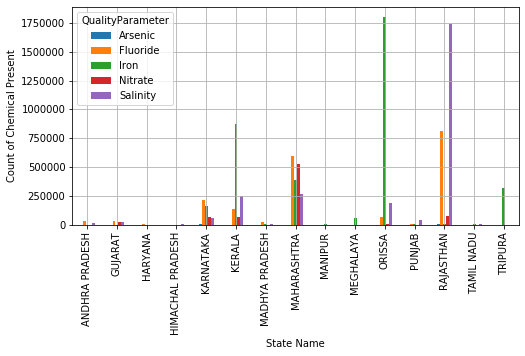

In [28]:
#Count of Chemical Present in each state
fig = Group2.plot.bar(figsize = (8,4), grid = True)
fig.set(ylabel = "Count of Chemical Present")

### Sub Question 3: How does the textile industry affect the water quality?

In [51]:
#Extracting Variables
exportdata['Time Index'] = [i+1 for i in range(len(exportdata))]
time = exportdata['Time Index'].values
money = exportdata['Export(US$Thousand)'].values
#Regression Statistics
x = exportdata['Time Index'].values.reshape(-1,1)
y = exportdata['Export(US$Thousand)'].values.reshape(-1,1)
mod = sm.OLS(endog = y, exog=x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              910.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):                    5.27e-24
Time:                        20:49:42   Log-Likelihood:                         -514.51
No. Observations:                  31   AIC:                                      1031.
Df Residuals:                      30   BIC:                                      1032.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.174e+06   3.89e+04     30.176      0.000    1.09e+06    1.25e+06
==============================================================================
Omnibus:                        3.114   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.224
Skew:                           0.655   Prob(JB):                        0.329
Kurtosis:                       3.091   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

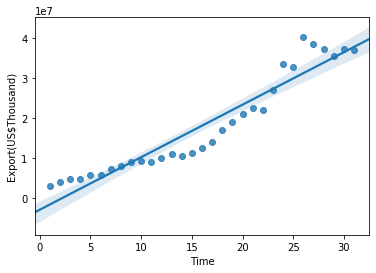

In [30]:
#Regression
sns.regplot(time, money)
plt.xlabel('Time')
plt.ylabel('Export(US$Thousand)')
plt.show()

### Sub Question 4: What was the average temperature each year?

In [57]:
df3.replace(['NAN',' ','nan'],np.nan,inplace=True)
df3['Temp'] = df3['Temp'].astype(float)
df3.info()

In [126]:
temp = df3.groupby('year').Temp.mean()

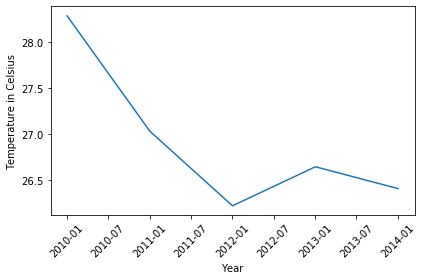

In [127]:
plt.plot(temp)
plt.xticks(rotation=45)
plt.ylabel('Temperature in Celsius')
plt.xlabel('Year')
plt.tight_layout()